# Computational Social Science Project #3 

**Enter your Name:** Jarett Maycott

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [26]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [27]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [28]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [29]:
chicago_inspections_2014.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
0,920444,2014-01-15,GALLISTEL LANGUAGE ACADEMY,GALLISTEL LANGUAGE ACADEMY,2046708,School,Risk 1 (High),10200 S AVENUE J,CHICAGO,IL,60617.0,Canvass,41.709957,-87.534223,"(41.70995714781606, -87.5342225149751)",Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.67,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
1,920445,2014-02-03,SUBWAY,SUBWAY,2183563,Restaurant,Risk 1 (High),4025 E 106TH ST,CHICAGO,IL,60617.0,Canvass,41.702577,-87.525872,"(41.70257660937248, -87.52587169711877)",Restaurant,2,0,0,0,0,0,0,0.794521,0,2183563-20120829,2183563.0,375027.0,AMI SUB INC.,SUBWAY,4025 E 106TH ST 1,CHICAGO,IL,60617.0,10.0,38.0,10-38,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2183563.0,ISSUE,2012-08-29,2014-09-15,AAI,41.702577,-87.525872,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
2,920446,2014-02-03,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,1477112,Restaurant,Risk 2 (Medium),2027 E 95TH ST,CHICAGO,IL,60617.0,Canvass,41.722372,-87.574275,"(41.72237211196818, -87.57427469548966)",Restaurant,0,0,6,0,0,0,2,0.660274,0,1477112-20120716,2155150.0,273266.0,"A & K SHARKS, INC.",SHARKS FISH & CHICKEN,2027 E 95TH ST,CHICAGO,IL,60617.0,7.0,49.0,7-49,4.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1477112.0,RENEW,2012-07-16,2014-07-15,AAI,41.722372,-87.574275,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
3,920448,2014-03-07,P K PETRO INC.,MARATHON,1331469,Grocery Store,Risk 3 (Low),7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,Canvass,41.767798,-87.585820,"(41.76779762303839, -87.58581991823232)",Other,0,1,7,0,0,0,0,2.000000,1,1331469-20121216,2194284.0,257899.0,P K PETRO INC.,Stony Shell,7001 S STONY ISLAND AVE,CHICAGO,IL,60649.0,5.0,21.0,5-21,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1331469.0,RENEW,2012-12-16,2014-12-15,AAI,41.767798,-87.585820,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
4,920449,2014-03-07,"Z T DOLLAR EXCHANGE,INC",DOLLAR STORE,2189299,Grocery Store,Risk 3 (Low),2429 E 72ND ST,CHICAGO,IL,60649.0,Canvass,41.764339,-87.565371,"(41.764339216775696, -87.5653706801239)",Other,1,2,5,0,0,0,0,2.000000,1,2189299-20121009,2189299.0,249904.0,"ZT DOLLAR EXCHANGE, INC.","Z T DOLLAR EXCHANGE, INC.",2429 E 72ND ST,CHICAGO,IL,60649.0,7.0,40.0,7-40,3.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,2189299.0,ISSUE,2012-10-09,2014-12-15,AAI,41.764339,-87.565371,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail


In [30]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [31]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag',
                                                ],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [32]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

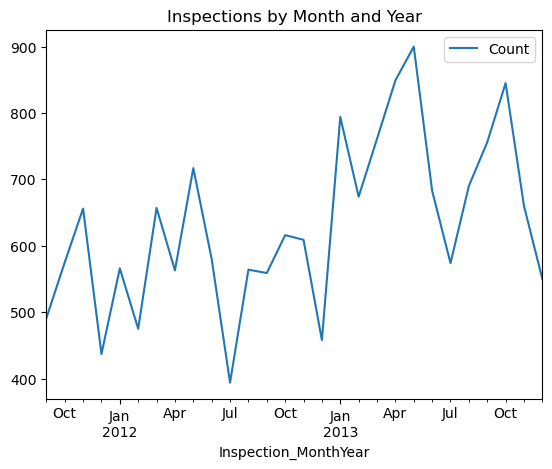

In [33]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

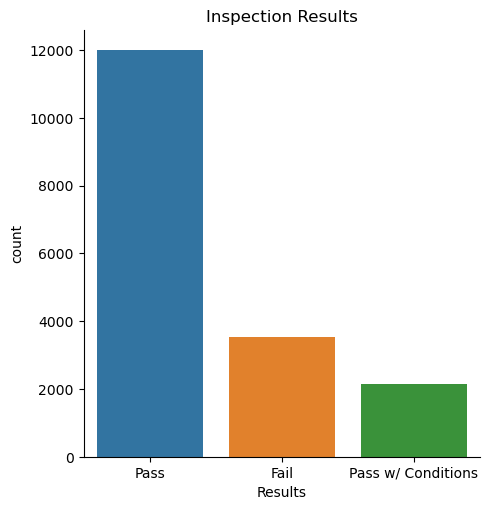

In [34]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

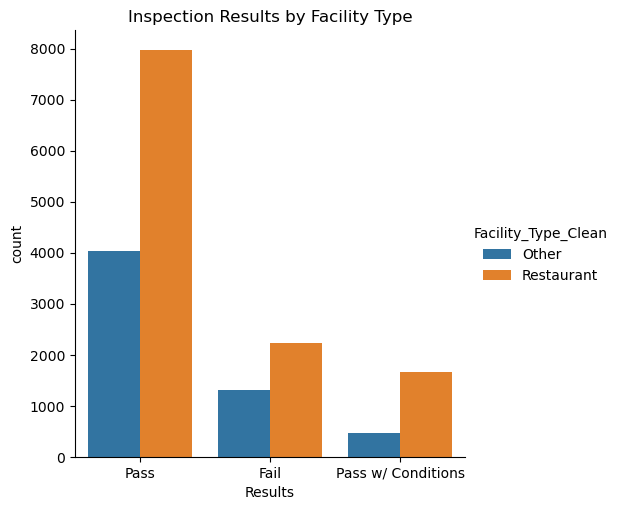

In [35]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [36]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [37]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [38]:
# view feature datset
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

Data Splitting

In [39]:
# Set seed
np.random.seed(10)

# Split into training and validation
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size=0.80, 
                                                            test_size=0.20,
                                                            stratify=y)

# We have a separate test dataset so no need for the test splt
# X_test, y_test are already provided as a separate test set in the last section

### Model 1: Logistic Regression

In [40]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

Grid search time to find the optimal hyperparameters

In [ ]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

Validation Accuracy 0.928 is very good!

###  Model 2: Random Forest

In [41]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='entropy',              # or you can use 'entropy' for information gain
                       max_depth=None,                  # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [42]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), 
                         cv=5)

In [43]:
# calculate the average score across models
# ----------
scores.mean()

0.9233882928350067

0.923 is lower than the logistic regression but lets check the which features contribute to the model so we can reduce impurity 

### Model 3: Adaptive Boosting

In [44]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [45]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [46]:
# calculate mean score across models 
# ----------
scores.mean()

0.9143099419058043

Our accuracy is still pretty great here but it is lower than our above models. 

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Set up Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# cross-validation and print results
for metric, scorer in scoring.items():
    scores = cross_val_score(logit_reg, X_train, y_train.ravel(), cv=cv, scoring=scorer)
    print(f'{metric.capitalize()}: {scores.mean():.4f} (±{scores.std():.4f})')

# fit on the entire training set
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)


The logistic regression model demonstrates strong overall performance with an average accuracy of 91.88%. the by the F1-score of 80.86% suggests it maintains a good balance between precision 77.05% and recall 85.14%. The standard deviation shows  consistency of these metrics across the different cross-validation folds. Overall the model shows robust predictive ability, accurately identifying positive instances while maintaining a high overall accuracy.

Lets evaluate the random forest model

In [47]:

# stratified K-Fold cross-validator (adjust the number of folds as needed)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#  cross-validation and print results
for metric, scorer in scoring.items():
    scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring=scorer)
    print(f'{metric.capitalize()}: {scores.mean():.4f} (±{scores.std():.4f})')

Accuracy: 0.9284 (±0.0028)
Precision: 0.7782 (±0.0101)
Recall: 0.9022 (±0.0205)
F1: 0.8354 (±0.0075)


The random forest model has an average accuracy of 92.84%, with 77.82% precisionand and recall of 90.22%. The F1-averages at 83.54%. Small standard deviations across these metrics highlight the model's consistencey across different cross-validation folds. 

and lastly the Adaptive boosting model

In [ ]:

# Stratified K-Fold cross-validator 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# cross-validation and print results
for metric, scorer in scoring.items():
    scores = cross_val_score(ada_classifier, X, y, cv=cv, scoring=scorer)
    print(f'{metric.capitalize()}: {scores.mean():.4f} (±{scores.std():.4f})')

The adaptive boost model has an average accuracy of 91.78%, similar to the logistic regression model. Precision is solid at 77.22% and while recallis 84.06%. The small standard deviations across these metrics suggest consistent and stable performance across different cross-validation folds, like our other models. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

we are going to plot the coefficients which are on the log-odds scale

In [ ]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

In [ ]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Our model is great at predicting the true negatives and still doing well predicting true positives!

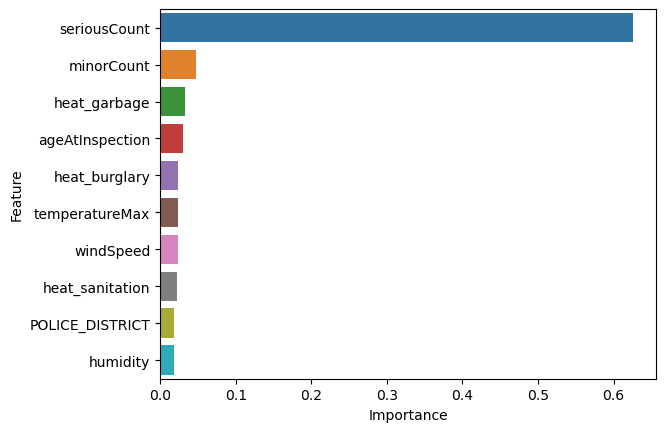

In [48]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # 10 features
plt.show()

Our model only shows one variable with high importance in our model. Our next step would be to reduce features into a basic decision tree to reduce impurity. 

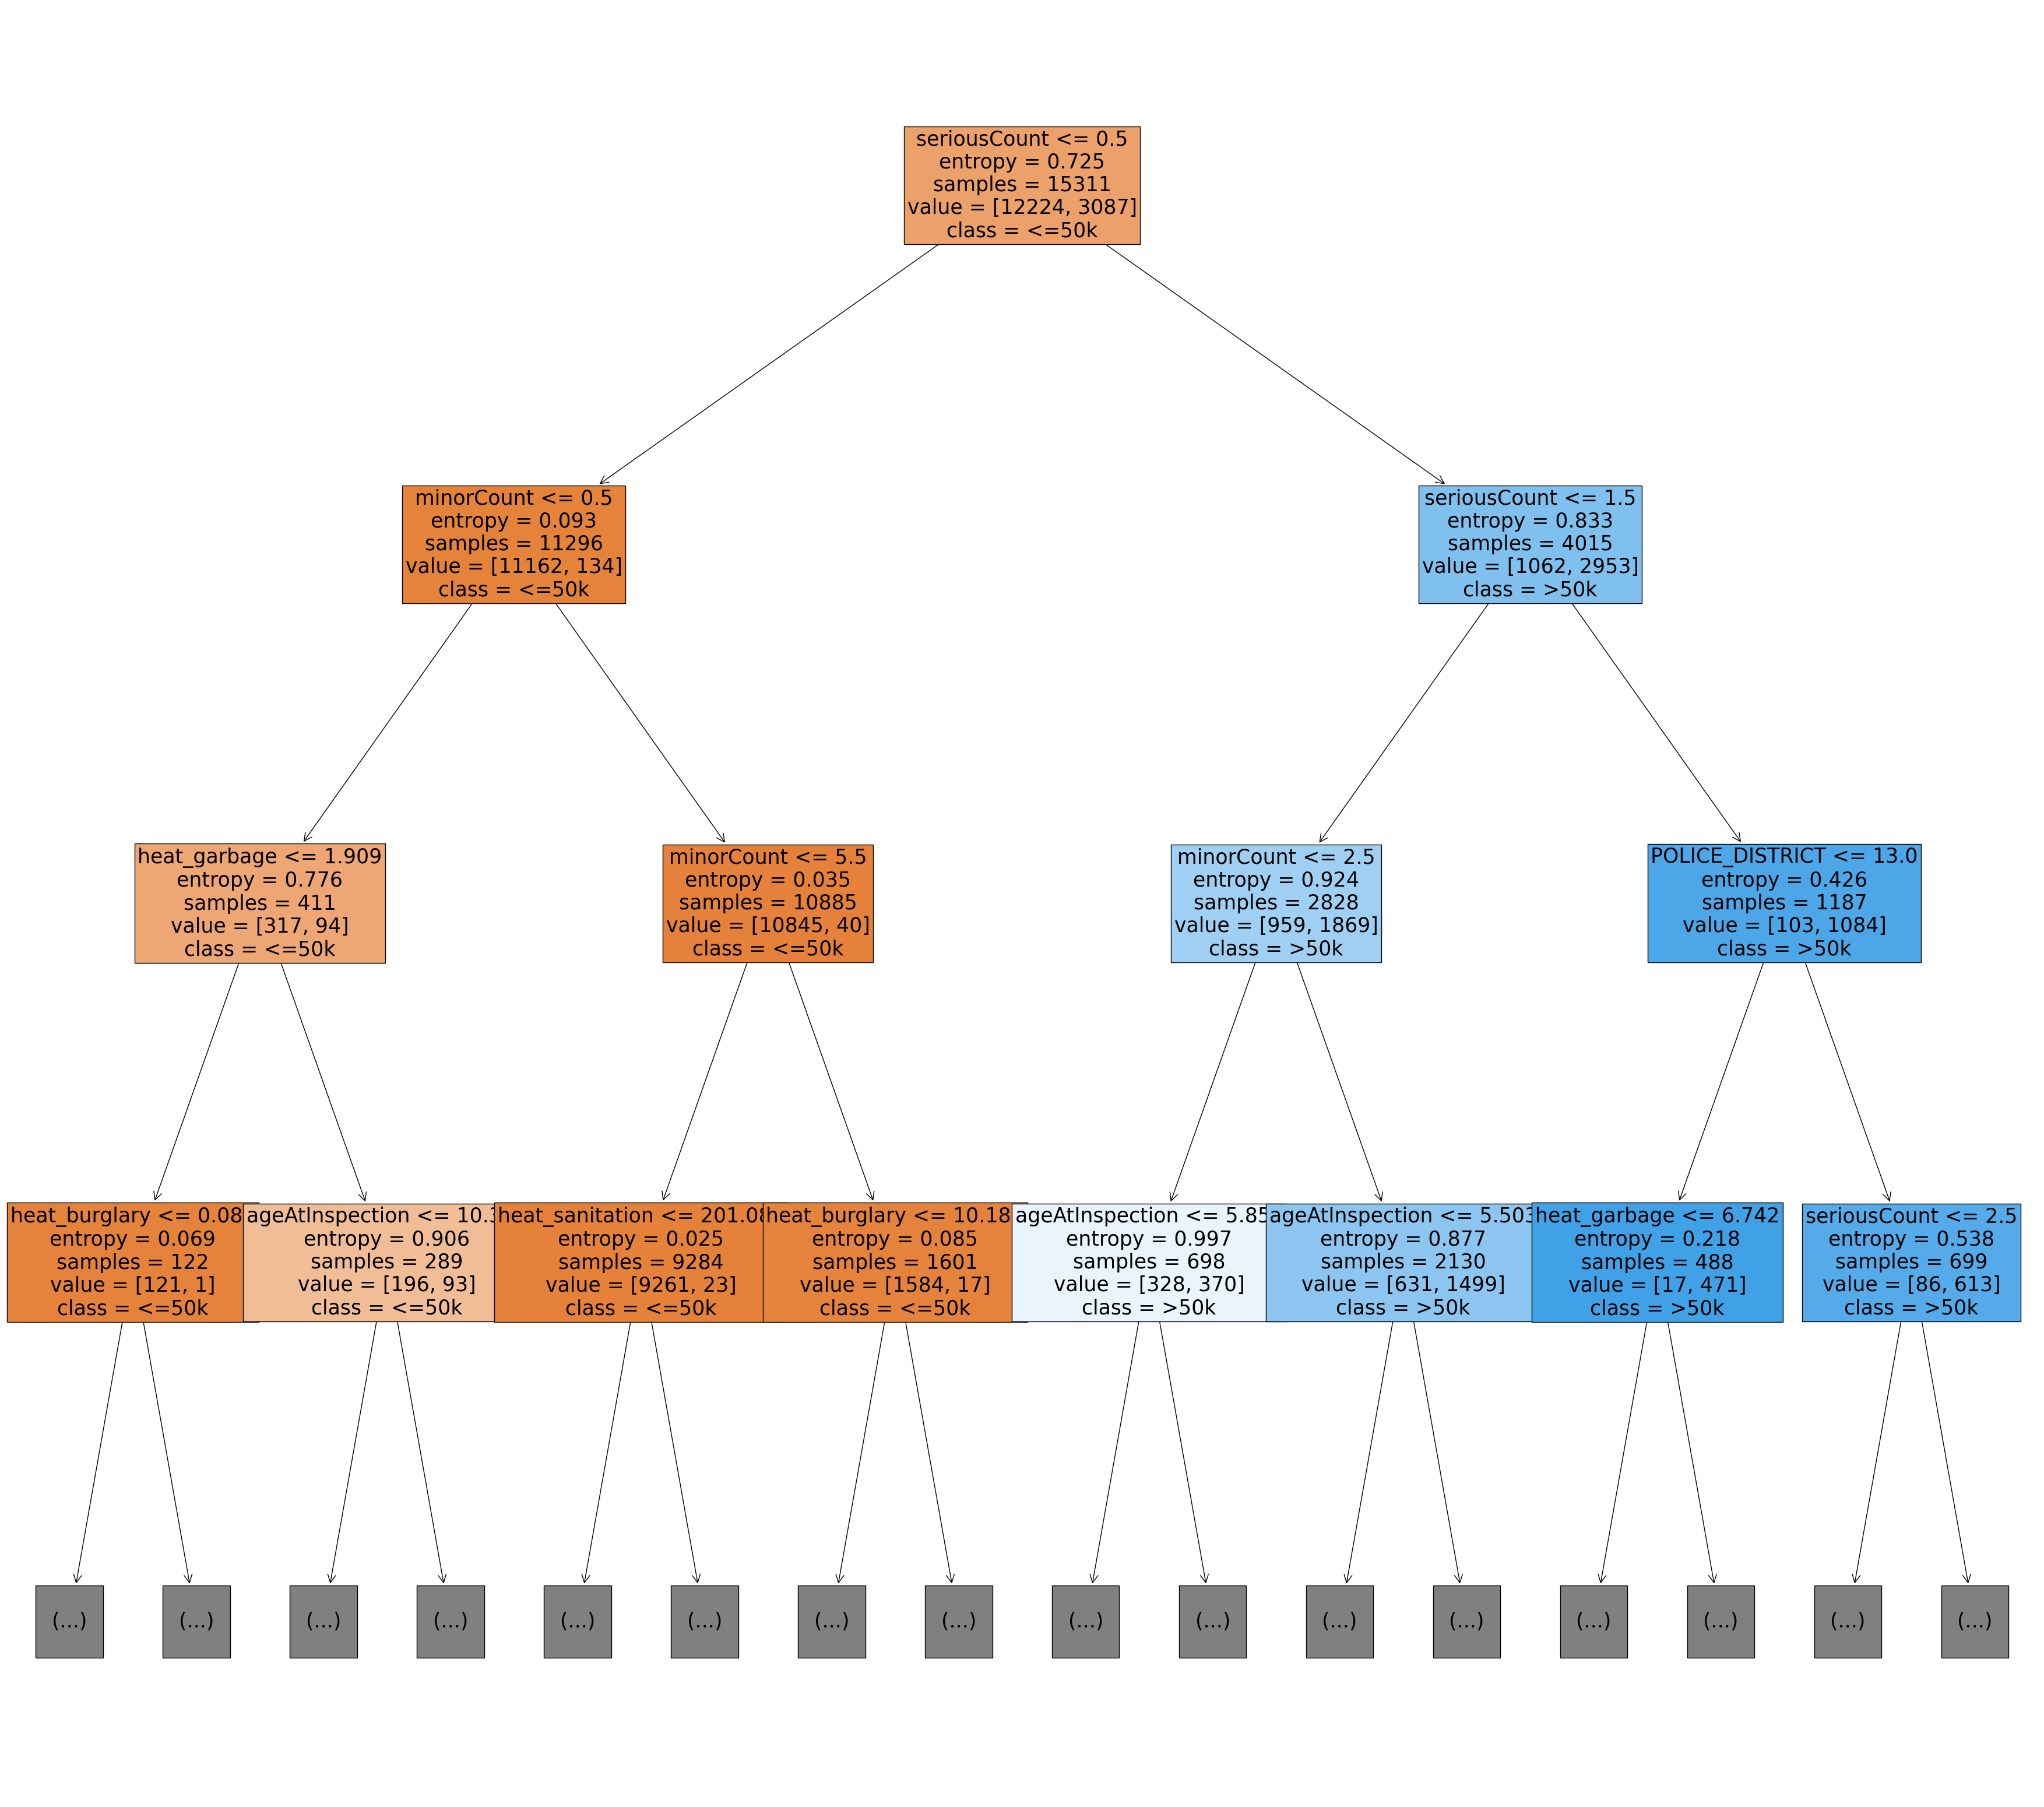

In [49]:

# refit a basic decision tree using reduced number of features 
# ----------
dt_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion='entropy',           # or 'entropy' for information gain
                                 splitter='best',               # or 'random' for random best split
                                 max_depth=5,                   # how deep tree nodes can go
                                 min_samples_split=2,           # samples needed to split node
                                 min_samples_leaf=1,            # samples needed for a leaf
                                 min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                 max_features=None,             # number of features to look for when splitting
                                 max_leaf_nodes=None,           # max nodes
                                 min_impurity_decrease=1e-07,   # early stopping
                                 random_state = 10)             # random seed

# pull out the most features
important_features = feat_importances.nlargest(10, 'Importance')['Feature']

# create new dataset with only most important features
X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit the model on the new reduced model
dt_reduced_classifier.fit(X_reduced,
                          y)

# set column names as list
reduced_column_names = X_reduced.columns.tolist()

# plot 
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree = dt_reduced_classifier,                          
                   feature_names=reduced_column_names,  # make sure its a list
                   class_names=["<=50k", ">50k"],       # specify class names
                   filled=True,                         # paint nodes to indicate majority class 
                   fontsize = 25,                       # set fontsize
                   max_depth = 3)                       # set max depth of tree to view   

In [50]:
# check the samples after root node
# ----------
X['seriousCount'].value_counts()

0    11296
1     2828
2      950
3      199
4       36
5        2
Name: seriousCount, dtype: int64

In [51]:
# stratified K-Fold cross-validator (adjust the number of folds as needed)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

#  cross-validation and print results
for metric, scorer in scoring.items():
    scores = cross_val_score(dt_reduced_classifier, X_reduced, y, cv=cv, scoring=scorer)
    print(f'{metric.capitalize()}: {scores.mean():.4f} (±{scores.std():.4f})')

Accuracy: 0.9220 (±0.0034)
Precision: 0.7556 (±0.0176)
Recall: 0.9083 (±0.0274)
F1: 0.8244 (±0.0068)


The decision tree classifier has an average accuracy of 92.10%. The precisionist 75.39%, while recall, capturing the proportion of actual positives identified, stands at an impressive 90.47%. The F1-score averages at 82.20%. The small standard deviations across these metrics indicate consistent and robust performance across the different cross-validation folds. This model is more likley to preidict false positives than the logistic regression model

now lets check feature importance

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [52]:
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.

# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# reduced decision tree
# ----------
dt_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion='entropy',           # or 'entropy' for information gain
                                 splitter='best',               # or 'random' for random best split
                                 max_depth=5,                   # how deep tree nodes can go
                                 min_samples_split=2,           # samples needed to split node
                                 min_samples_leaf=1,            # samples needed for a leaf
                                 min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                 max_features=None,             # number of features to look for when splitting
                                 max_leaf_nodes=None,           # max nodes
                                 min_impurity_decrease=1e-07,   # early stopping
                                 random_state = 10)     

ada_classifier = AdaBoostClassifier(n_estimators=100)

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('dt', dt_reduced_classifier),
                                     ('ada', ada_classifier)],
                        # specify voting
                        voting = 'hard')

# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       dt_reduced_classifier, 
                       ada_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Decision Tree', 
                                            'Ada Boost',
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X_reduced, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))


Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Decision Tree]
Accuracy: 0.91 [Ada Boost]
Accuracy: 0.92 [Ensemble]


In [54]:
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('dt', dt_reduced_classifier),
                                     ('ada', ada_classifier)],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas = [c.fit(X_reduced, y.ravel()).predict_proba(X_reduced)[:,1] for c in (log_reg, 
                                                              dt_reduced_classifier,
                                                              ada_classifier,
                                                              voting_classifier)]
                                      
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0: 'logit',
                           1: 'dt',
                           2: 'ada',
                           3: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

,logit,dt,ada,ensemble
0,0.017191,0.001838,0.483847,0.167625
1,0.021337,0.001838,0.486938,0.170037
2,0.990568,0.864564,0.506436,0.787189
3,0.026236,0.012893,0.488370,0.175833
4,0.989295,0.864564,0.507713,0.787190
5,0.610330,0.672593,0.502791,0.595238
6,0.020027,0.006278,0.484487,0.170264
7,0.022207,0.006278,0.486527,0.171671
8,0.026533,0.001838,0.486426,0.171599
9,0.021792,0.001838,0.486060,0.169897


In [55]:
sorted_probs_df = probs_df.head(10).sort_values(by='ensemble', ascending=False)

# Display the sorted DataFrame
sorted_probs_df.head(10)

,logit,dt,ada,ensemble
4,0.989295,0.864564,0.507713,0.787190
2,0.990568,0.864564,0.506436,0.787189
5,0.610330,0.672593,0.502791,0.595238
3,0.026236,0.012893,0.488370,0.175833
7,0.022207,0.006278,0.486527,0.171671
8,0.026533,0.001838,0.486426,0.171599
6,0.020027,0.006278,0.484487,0.170264
1,0.021337,0.001838,0.486938,0.170037
9,0.021792,0.001838,0.486060,0.169897
0,0.017191,0.001838,0.483847,0.167625


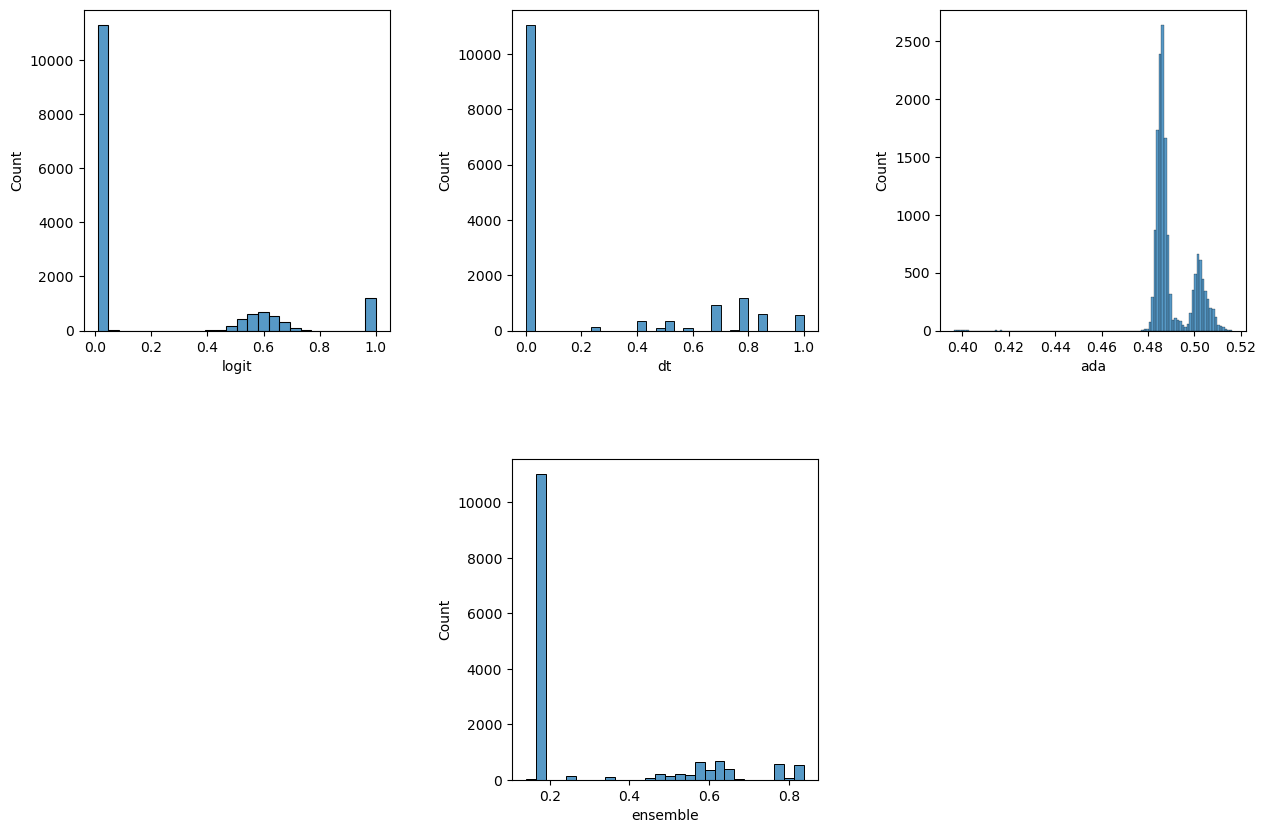

In [56]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

# visualize distributions
# ----------
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# logit
ax = fig.add_subplot(2, 3, 1)
sns.histplot(probs_df, x="logit", ax=ax)

# decision tree
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probs_df, x="dt", ax=ax)

# adaptive boosting
ax = fig.add_subplot(2, 3, 3)
sns.histplot(probs_df, x="ada", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 5)
sns.histplot(probs_df, x="ensemble", ax=ax)

# show plot 
plt.show() 

In [57]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

random_sample = X_reduced.sample(n=1000, random_state=10)  # Use a specific random_state for reproducibility

# Display the randomly selected sample
random_sample.head(10)

,,seriousCount,minorCount,POLICE_DISTRICT,ageAtInspection,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation
Inspection_ID,DBA_Name,,,,,,,,,,
1285258,SUBWAY,0,0,18.0,1.123288,79.640000,12.096667,0.580000,69.445875,9.352639,16.951211
1353608,GOLDEN TIARA LTD,0,2,17.0,11.909589,82.826667,9.633333,0.733333,12.969043,11.933190,21.732413
1154370,TAURUS FLAVORS,1,7,5.0,9.564384,67.706667,9.160000,0.563333,37.680118,28.425611,21.246919
1235901,PIZZERIA AROMA,1,4,20.0,11.328767,69.210000,10.693333,0.660000,29.714283,12.631383,15.915626
1227300,VALENTINA RESTAURANT,0,4,8.0,9.821918,64.813333,22.116667,0.520000,11.572716,10.195958,11.687413
1150457,GILHOOLEY'S GRANDE SALOON,0,0,22.0,7.726027,86.863333,11.483333,0.456667,0.000001,2.464997,0.675799
1092429,EINSTEIN BROS. BAGELS # 2578,2,2,19.0,11.213699,60.813333,7.026667,0.683333,14.505548,29.675545,11.835897
1151866,GARIBAY POULTRY,1,3,10.0,4.928767,23.583333,9.636667,0.683333,13.442027,27.956773,12.811106
1361441,MART ANTHONY,0,6,12.0,7.736986,47.550000,8.980000,0.690000,14.095711,8.129947,35.905430


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [58]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

In [59]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  # 'Inspection_MonthYear'],
                                                                                  axis = 1)

In [60]:
X_reduced.columns

Index(['seriousCount', 'minorCount', 'POLICE_DISTRICT', 'ageAtInspection',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation'],
      dtype='object')

In [65]:
y_test2014 = chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X_test2014 = chicago_inspections_2014[['seriousCount',
                                              'minorCount', 
                                              'POLICE_DISTRICT', 
                                              'ageAtInspection',
                                              'temperatureMax',
                                              'windSpeed',
                                              'humidity',
                                              'heat_burglary',
                                              'heat_garbage',
                                              'heat_sanitation']]
                                              
# get dummies
X_test2014 = pd.get_dummies(X_test2014)

In [ ]:
# process features
#X_test2014 = chicago_inspections_2014.drop(columns = ['Results'])
#X_test2014 = pd.get_dummies(X_test2014)

# process target 
#y_test2014 = chicago_inspections_2014['Results']

In [68]:
# predict and compare 
# -----------
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer
y_pred = voting_classifier.predict(X_test2014)


# Print classification report
print("Classification Report:\n", classification_report(y_test2014, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test2014, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test2014, y_pred)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      3071
           1       0.70      0.87      0.78       756

    accuracy                           0.90      3827
   macro avg       0.83      0.89      0.86      3827
weighted avg       0.91      0.90      0.90      3827

Confusion Matrix:
 [[2789  282]
 [  98  658]]
Accuracy: 0.900705513457016


# evaluate
# -----------
The model correctly predicts the outcome in 90% of cases. The precision fail is 0.70. This indicates that out of the instances predicted as "Fail," 70% are actually true Failures. The recall for class 1 is 0.87. This means that the model correctly identifies 87% of the actual Failures.

The goal is to reduce harm to public health by identifying potential issues in food safety, the primary focus should be on maximizing Recall. This ensures that the model minimizes the risk of overlooking establishments with safety concerns, contributing to a more effective and proactive approach in safeguarding public health. Our model has a a recall of 87%, which is a pretty good metric but may be tuned further. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


In the social sciences and public policy, using machine learning goes beyond just measuring accuracy. It's crucial to consider metrics like precision, recall, and F1-score, especially when dealing with imbalanced data or situations where different types of errors have varying consequences. Policymakers need models that are not only accurate but also interpretable, considering the potential biases and ethical implications. These additional metrics help provide a more realistic and nuanced understanding of a model's performance, guiding decision-makers in assessing its impact and reliability in real-world contexts.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

When policymakers use computer programs to decide who gets audited, some businesses might try to change how they act to avoid getting caught. To deal with this, policymakers can regularly update the computer program, make sure it's easy to understand, and add an element of randomness so businesses can't predict why they're being audited. They should also tell businesses why they were audited, monitor how well the program is working, and adapt it to changes. Setting clear rules, working with businesses, and involving the public can prevent unfair practices. By doing all this, policymakers can make sure the system is fair and works well.